In [72]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [73]:
file = open('Testbed-On-Mordecai-Model/Synthetic/D_ground_truth.txt','r')
D_gt = []
line = file.readline()
D_gt = np.array([float(x) for x in line[1:-1].split(",")])

In [137]:
file = open('Testbed-On-Mordecai-Model/Synthetic/noisy_D_start.txt','r')
D_noisy = []
line=file.readline()
line = file.readline()
D_noisy = np.array([float(x) for x in line[1:-2].split(",")])

In [198]:
file = open('Testbed-On-Mordecai-Model/Synthetic/D_start.txt','r')
D_start = []
line = file.readline()
D_start = np.array([float(x) for x in line[1:-2].split(",")])

In [199]:
D_start

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,   10.,   10.,   10.,   10.,   10.,
         10.,   20.,   20.,   20.,   30.,   30.,   40.,   40.,   50.,
         60.,   70.,   80.,   90.,  120.,  120.,  150.,  170.,  200.,
        220.,  260.,  300.,  340.,  380.,  410.,  440.,  510.,  550.,
        630.,  710.,  800.,  880.,  990., 1130., 1250., 1400., 1590.,
       1730., 1990., 2170., 2210., 1970., 1800., 1760., 1690., 1640.,
       1590., 1560., 1520., 1530., 1490., 1480., 1460., 1460., 1460.,
       1410., 1420., 1400., 1380., 1370., 1360., 1340., 1360., 1320.,
       1360., 1300., 1300., 1290., 1290., 1280.])

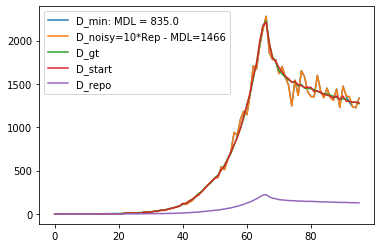

(1897, 98)
97


In [205]:
file = open('Testbed-On-Mordecai-Model/Synthetic/optimization_log.txt','r')
data = {}
i=  1
entry = 0
for line in file.readlines():
    if i%2 == 1:
        entry = float(line)
    else:
        data[entry] = [float(x) for x in line[1:-2].split(',')]
    i += 1

df  = pd.DataFrame(data).T.reset_index()
df.rename(columns={'index':'MDLcost'},inplace =True)


rmse = []
for i in range(df.shape[0]):
    D = df.iloc[i,1:].values
    rmse.append(np.linalg.norm(D - D_gt) / len(D_gt))
df['rmse'] = rmse



df.sort_values('MDLcost',inplace = True)

D_min = df.iloc[0,1:-1].values
min_data = df.iloc[0,0]
plt.plot(D_min,label="D_min: MDL = {}".format(min_data))
plt.plot(D_noisy,label="D_noisy=10*Rep - MDL=1466")
plt.plot(D_gt,label="D_gt")
plt.plot(D_start,label="D_start")

plt.plot(D_gt/10,label="D_repo")

plt.legend(loc='upper left')
plt.show()
print(df.shape)
#plt.savefig("900MDL.png",dpi=300)

df.reset_index(inplace=True)
min_index = df.loc[0,'index']
min_rmse = df.loc[0,'rmse']
print(min_index)
df.sort_values(by='index',inplace=True)

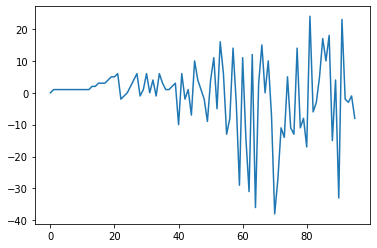

In [201]:
plt.plot(D_gt-D_start,label="D_gt")

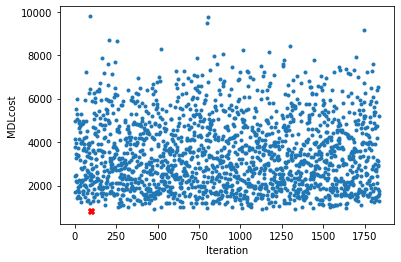

Text(0, 0.5, 'rmse')

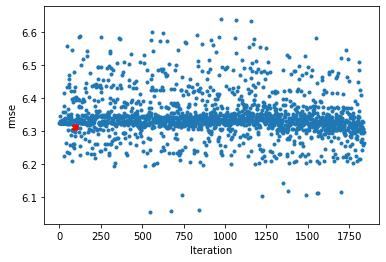

In [183]:
plt.scatter(df['index'],df['MDLcost'],marker='.')
plt.scatter(min_index,min_data,marker='X',color='red')
plt.xlabel('Iteration')
plt.ylabel('MDLcost')

plt.show()

plt.scatter(df['index'],df['rmse'],marker='.')
plt.scatter(min_index,min_rmse,marker='X',color='red')
plt.xlabel('Iteration')
plt.ylabel('rmse')

Text(0, 0.5, 'MDL cost for D')

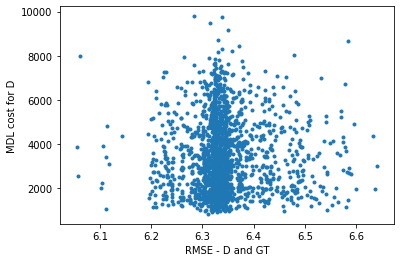

In [184]:
plt.scatter(df['rmse'],df['MDLcost'],marker='.')
plt.xlabel('RMSE - D and GT')
plt.ylabel('MDL cost for D')

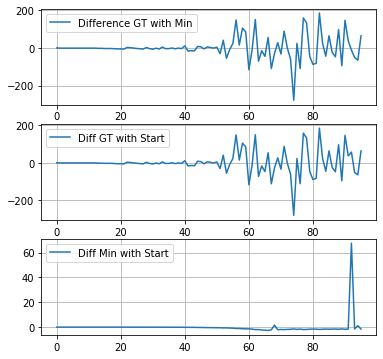

In [141]:
fig, axs = plt.subplots(3,1,figsize=(6,6))
for i in range(3):
    axs[i].grid('on')
axs[0].plot(D_min-D_gt)
axs[0].legend(['Difference GT with Min'])

axs[1].plot(D_noisy-D_gt)
axs[1].legend(['Diff GT with Start'])

axs[2].plot(D_noisy-D_min)
axs[2].legend(['Diff Min with Start'],loc='upper left')

plt.show()

In [54]:
(np.sum((D_noisy-D_gt)**2)), (np.sum((D_min-D_gt)**2))

(368752.10672355274, 369104.40870885516)

In [46]:
noisy_D_start = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.336019449505944, 9.660296430460503, 9.686874074211703, 10.969980162316533, 8.804563444395221, 9.778846911069719, 20.638289317991195, 20.41103917699476, 20.65591729487729, 28.833580509595382, 32.68726900434457, 43.265941141186936, 38.47140570578871, 49.90763909868599, 57.0217206447135, 71.05540450534576, 80.28108141280707, 87.48209183779771, 129.80355005927984, 111.45329440857635, 140.98375306065992, 168.01358883733215, 214.61233843186614, 213.4199857935614, 274.79240016216795, 296.0066346520135, 361.1954898204404, 362.3336811529732, 339.85359305582404, 470.27848643547355, 478.2850743207371, 466.6503884886385, 625.5016777350878, 720.8847412138991, 860.0318233319828, 940.6253743529813, 994.3186692466072, 1214.6677824285898, 1306.9745648876521, 1386.435602536435, 1647.6694718184606, 1769.687265761775, 1847.6184509109287, 2040.8049883957183, 2361.4824652216034, 2153.169716876198, 1762.0553026243551, 1754.027683871975, 1564.9289669436573, 1473.8121618096036, 1468.5296853985283, 1570.774263684062, 1429.388750280992, 1468.2565699585555, 1536.116957419302, 1498.3515849247385, 1538.7985384473004, 1417.9321485291866, 1474.0666405727422, 1381.4714413750646, 1308.7253124023841, 1497.433091650252, 1291.8834398009744, 1557.4996540556838, 1351.7442532017997, 1436.3969745849477, 1356.5380414776507, 1373.8663299062482, 1249.7693030195283, 1289.8862256654409, 1349.2221584499257, 1320.8293468437282, 1436.303278308698, 1183.889081273131])
plt.plot(D_start)
plt.plot(noisy_D_start)

NameError: name 'D_start' is not defined

In [ ]:
fig, axs = plt.subplots(3,1,figsize=(6,6))
for i in range(3):
    axs[i].grid('on')
axs[0].plot(D_min-D_gt)
axs[0].legend(['Difference GT with Min'])

axs[1].plot(noisy_D_start-D_gt)
axs[1].legend(['Diff GT with Start'])

axs[2].plot(noisy_D_start-D_min)
axs[2].legend(['Diff Min with Start'],loc='lower right')

plt.show()

In [19]:
df.head()

,MDLcost,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
97,835.0,0.000005,5.428037e-06,0.000005,5.428037e-06,5.428037e-06,5.428037e-06,0.000005,5.428037e-06,0.000005,...,1346.472921,1311.306541,1442.562376,1229.412802,1474.115531,1361.089328,1286.976403,1236.682673,1223.729156,1336.431806
1331,911.0,0.000008,6.782185e-06,-0.000009,-7.003646e-07,-1.141461e-05,-9.174965e-06,0.000014,9.530860e-07,0.000016,...,1340.351204,1309.021701,1444.137762,1226.767264,1475.932675,1361.196661,1340.801271,1237.716245,1224.626269,1335.223020
477,930.0,-0.000005,7.966938e-07,-0.000011,7.665025e-07,7.552908e-07,-1.009997e-05,-0.000008,-6.459691e-06,-0.000005,...,1343.006712,1306.162242,1441.987202,1224.981639,1473.527776,1360.343543,1350.240655,1236.189587,1222.844270,1335.898949
1130,945.0,-0.000014,-9.781980e-06,-0.000012,-3.010941e-06,3.318355e-06,2.844938e-07,0.000016,-4.418215e-06,0.000015,...,1338.416764,1304.234858,1440.373866,1227.806287,1468.605429,1362.963520,1339.596443,1236.923290,1219.693236,1339.579927
1441,960.0,-0.000014,-1.452012e-05,-0.000018,-1.218501e-05,-2.646381e-06,-2.208379e-05,0.000006,6.987211e-06,0.000011,...,1342.414267,1306.624976,1445.685839,1225.608953,1473.719408,1360.936688,1341.551073,1236.289690,1222.118562,1336.572445


In [50]:
df

,index,MDLcost,0,1,2,3,4,5,6,7,...,86,87,88,89,90,91,92,93,94,95
1043,0,3797.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1344.906520,1309.781051,1440.884191,1227.982582,1472.400639,1359.505924,1354.542346,1235.243995,1224.934944,1334.877087
1355,1,4993.0,0.000250,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1344.906515,1309.781046,1440.884185,1227.982577,1472.400633,1359.505918,1354.542341,1235.243991,1224.934939,1334.877082
577,2,2450.0,0.000000,0.000250,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1344.906515,1309.781046,1440.884185,1227.982577,1472.400633,1359.505918,1354.542341,1235.243991,1224.934939,1334.877082
240,3,1705.0,0.000006,0.000006,0.000006,0.000006,5.865257e-06,0.000006,0.000006,5.865257e-06,...,1342.499960,1310.161588,1441.302819,1228.339354,1472.828423,1359.900908,1348.536261,1235.602877,1222.446332,1335.264916
1136,4,4124.0,0.000000,0.000000,0.000000,0.000250,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1344.906515,1309.781046,1440.884185,1227.982577,1472.400633,1359.505918,1354.542341,1235.243991,1224.934939,1334.877082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,1648,7179.0,-0.000022,-0.000011,-0.000010,0.000005,6.102127e-06,-0.000004,0.000024,5.563473e-06,...,1342.848299,1308.466576,1440.026231,1228.710145,1473.927311,1364.814267,1336.017233,1236.770250,1223.432355,1339.729570
1189,1649,4322.0,-0.000018,-0.000007,-0.000008,-0.000003,1.104359e-05,-0.000005,0.000008,2.056757e-06,...,1339.342764,1307.954949,1441.126176,1227.890705,1476.609742,1360.662766,1338.532841,1235.067564,1220.308403,1339.194235
1170,1650,4245.0,0.000007,-0.000006,-0.000002,-0.000001,5.228711e-07,-0.000004,0.000009,6.323256e-06,...,1343.643261,1311.337758,1439.460756,1226.674911,1476.030560,1356.924568,1339.811253,1234.746776,1226.194903,1335.745597
1179,1651,4267.0,0.000006,-0.000016,-0.000009,-0.000019,6.121061e-06,-0.000009,0.000006,9.555533e-07,...,1341.395567,1307.673775,1443.295884,1263.531361,1471.617735,1358.511966,1339.682634,1234.524147,1222.660550,1336.998084


In [51]:
df.sort_values('MDLcost')

,index,MDLcost,0,1,2,3,4,5,6,7,...,86,87,88,89,90,91,92,93,94,95
0,97,835.0,5.428037e-06,5.428037e-06,5.428037e-06,5.428037e-06,5.428037e-06,5.428037e-06,5.428037e-06,5.428037e-06,...,1346.472921,1311.306541,1442.562376,1229.412802,1474.115531,1361.089328,1286.976403,1236.682673,1223.729156,1336.431806
1,1331,911.0,7.902807e-06,6.782185e-06,-9.334601e-06,-7.003646e-07,-1.141461e-05,-9.174965e-06,1.354666e-05,9.530860e-07,...,1340.351204,1309.021701,1444.137762,1226.767264,1475.932675,1361.196661,1340.801271,1237.716245,1224.626269,1335.223020
2,477,930.0,-5.156920e-06,7.966938e-07,-1.057255e-05,7.665025e-07,7.552908e-07,-1.009997e-05,-8.205604e-06,-6.459691e-06,...,1343.006712,1306.162242,1441.987202,1224.981639,1473.527776,1360.343543,1350.240655,1236.189587,1222.844270,1335.898949
3,1130,945.0,-1.396016e-05,-9.781980e-06,-1.167428e-05,-3.010941e-06,3.318355e-06,2.844938e-07,1.625658e-05,-4.418215e-06,...,1338.416764,1304.234858,1440.373866,1227.806287,1468.605429,1362.963520,1339.596443,1236.923290,1219.693236,1339.579927
4,1441,960.0,-1.441328e-05,-1.452012e-05,-1.807191e-05,-1.218501e-05,-2.646381e-06,-2.208379e-05,5.874730e-06,6.987211e-06,...,1342.414267,1306.624976,1445.685839,1225.608953,1473.719408,1360.936688,1341.551073,1236.289690,1222.118562,1336.572445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,252,8658.0,1.123463e-07,1.123463e-07,1.123463e-07,1.123463e-07,1.123463e-07,1.123463e-07,1.123463e-07,1.123463e-07,...,1343.264089,1308.181515,1439.124549,1226.482941,1470.602508,1357.845663,1351.457054,1233.735486,1223.384539,1333.246903
1649,205,8704.0,6.145182e-06,6.145182e-06,6.145182e-06,6.145182e-06,6.145182e-06,6.145182e-06,6.145182e-06,6.145182e-06,...,1342.216839,1310.129620,1441.267650,1228.309382,1472.792485,1359.867726,1351.049953,1235.572728,1222.280678,1335.232335
1650,797,9472.0,-6.470634e-06,-1.229044e-05,1.645507e-04,-1.374686e-05,1.420124e-05,-1.774506e-05,4.534692e-06,5.879027e-07,...,1341.808373,1306.164408,1440.805343,1226.160775,1469.948936,1361.739639,1346.112168,1234.526744,1221.032016,1338.068422
1651,804,9751.0,-1.294709e-05,-8.426188e-07,-2.233354e-07,-1.994641e-06,1.188199e-05,-7.229751e-07,1.102825e-05,-1.324752e-06,...,1340.952816,1307.791702,1439.947598,1229.309528,1469.051615,1361.376900,1345.672366,1233.790157,1220.491031,1337.270002


In [142]:
import scipy as sc

In [151]:
def RMSE(D):
    rmse = np.linalg.norm(D - D_gt) / len(D_gt)
    #print(rmse, end=', ')
    return np.linalg.norm(D - D_gt) / len(D_gt)

In [173]:
D_fin = []
for i in range(5):
    res = sc.optimize.minimize(fun=RMSE, 
           x0=D_noisy, 
           method='nelder-mead',
           options={'maxiter': 100+600*i,'xtol':0.000001, 'ftol':0.0000001,'adaptive': True})
    print("FINISHEd OPTI")
    D_fin.append(res.x)


FINISHEd OPTI
FINISHEd OPTI
FINISHEd OPTI
FINISHEd OPTI
FINISHEd OPTI


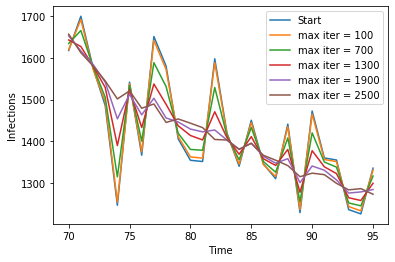

In [186]:
plt.plot(range(70,96),D_noisy[70:],label='Start')
for i in range(5):
    plt.plot(range(70,96),D_fin[i][70:],label='max iter = {}'.format(100+600*i))
    plt.xlabel("Time")
    plt.ylabel("Infections")
    plt.legend()